In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [10]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [31]:
import numpy as np

from scipy.stats import chisquare

def rel_chisquare(token, bins=100):
    
    # Get the raw token series.
    series = Token.token_series(token)
    
    # Total token count.
    total_count = sum(series.values())
    
    # By default, 0s in all bins.
    f_obs = np.zeros(bins)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    # Compare to the box distribution.
    f_exp = np.full(bins, 1/bins)
    
    return chisquare(f_obs, f_exp)

In [35]:
data = []
for token in tokens:
    chi, p = rel_chisquare(token)
    data.append((token, chi, p))

In [38]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'chi', 'p'))

df.sort_values('chi', ascending=False, inplace=True)

In [42]:
def plot_token_series(token, figsize=(5,2)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

edition


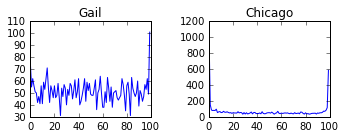

iii


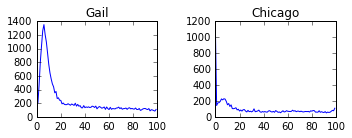

vii


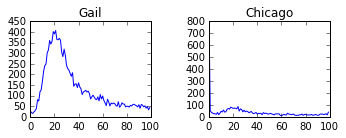

published


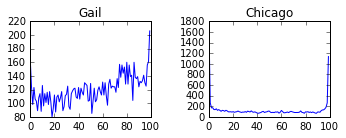

viii


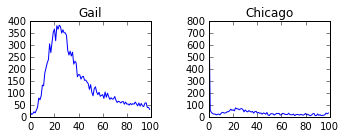

fiction


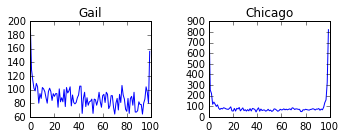

xi


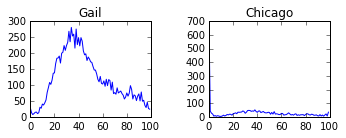

ix


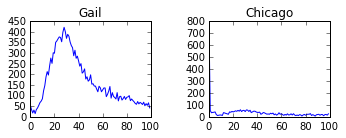

xix


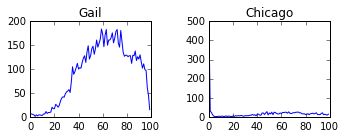

xviii


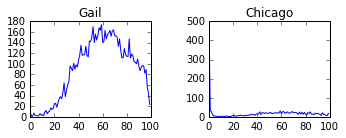

xx


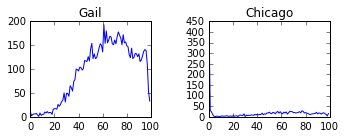

xvii


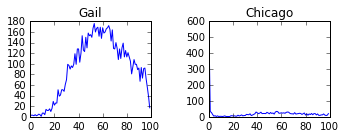

project


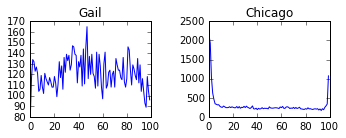

distributed


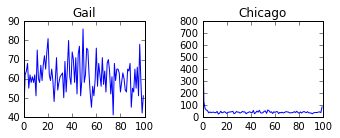

xii


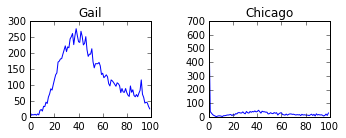

xiii


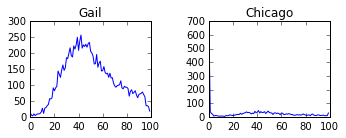

iv


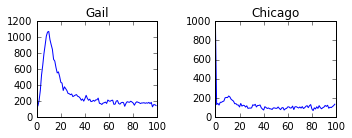

xvi


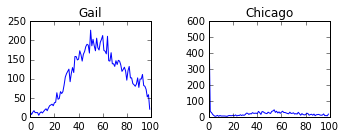

xv


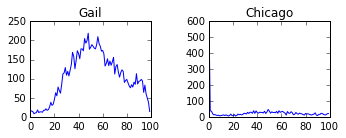

novels


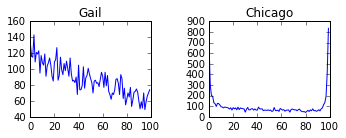

author


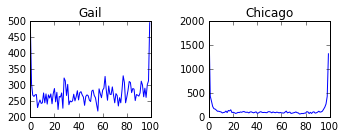

xiv


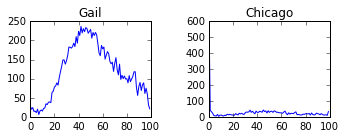

vi


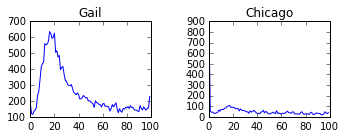

authors


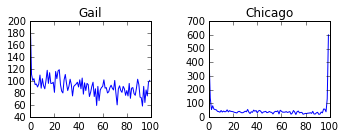

chapter


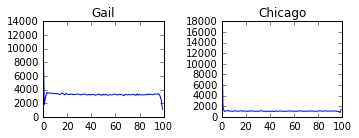

readers


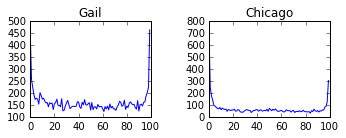

ii


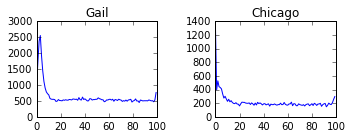

bridal


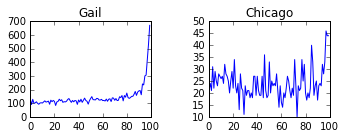

domain


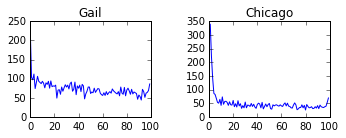

media


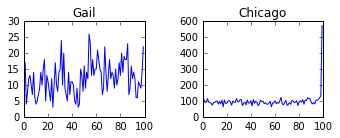

prosecution


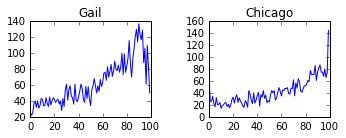

illustration


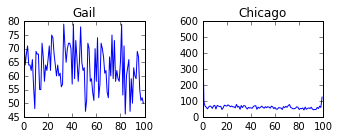

eldest


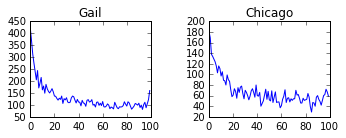

complexion


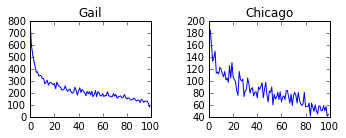

vol


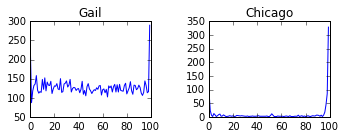

congratulations


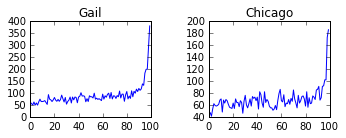

graduated


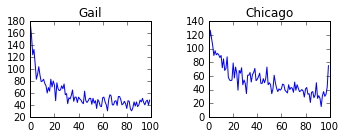

medium


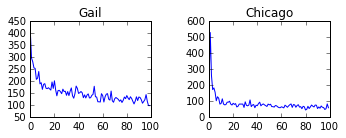

io


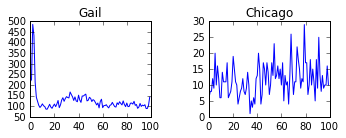

forgiveness


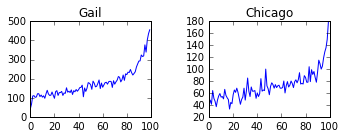

novel


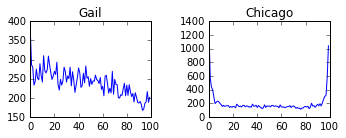

characters


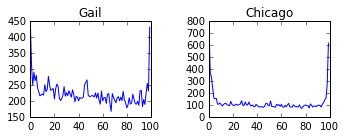

bride


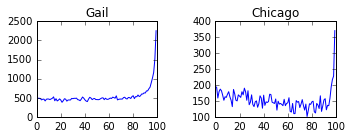

wronged


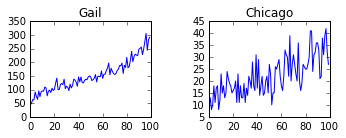

athletic


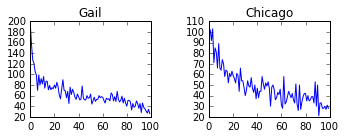

ze


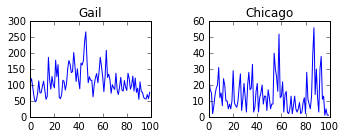

wedding


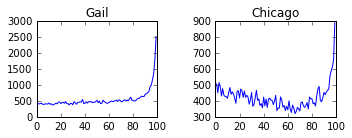

titles


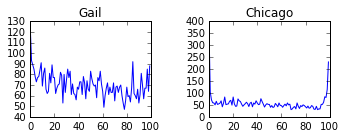

inherited


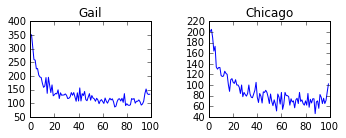

traveller


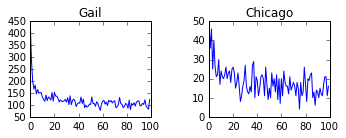

tutor


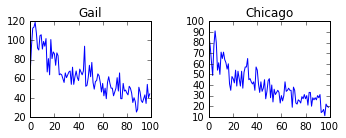

university


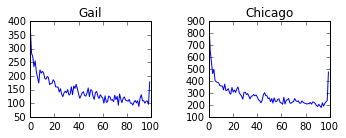

trigger


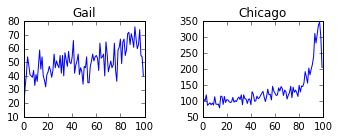

stature


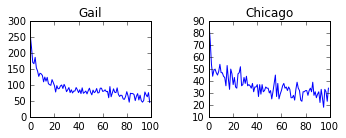

fertile


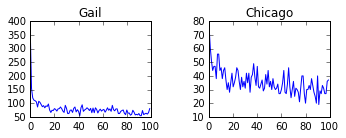

youngest


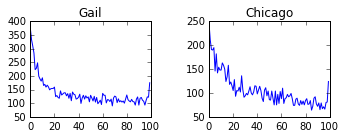

oxford


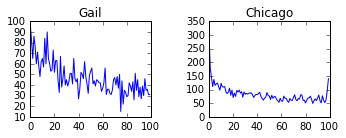

mahogany


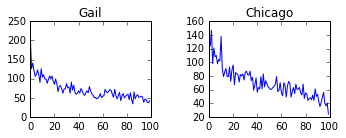

metropolis


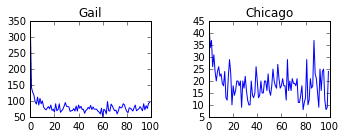

introduction


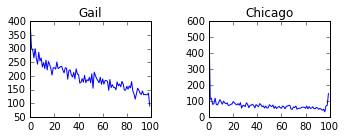

historical


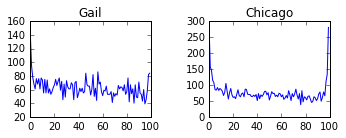

reader


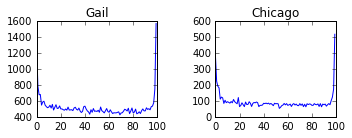

century


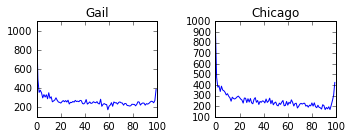

honeymoon


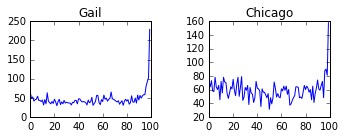

classic


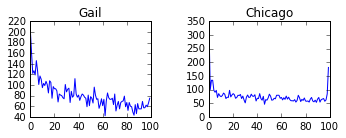

homestead


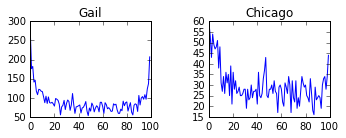

aristocratic


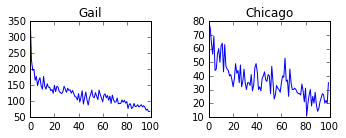

confession


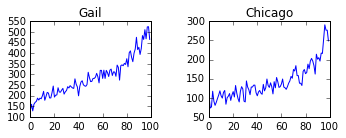

picturesque


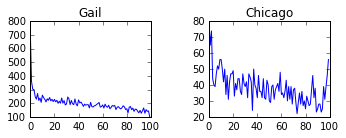

graduate


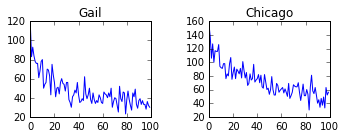

tanned


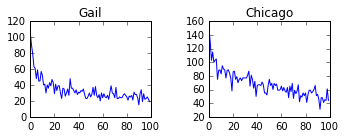

architecture


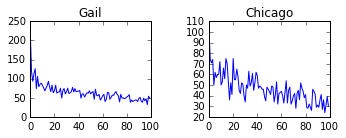

oval


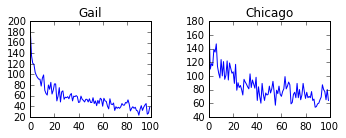

situated


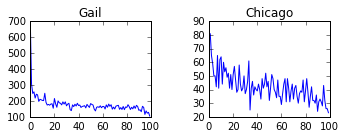

academy


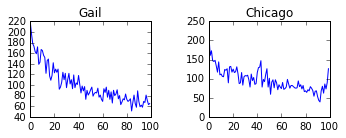

stretches


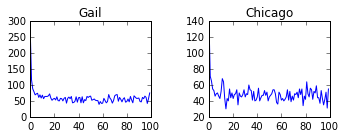

acres


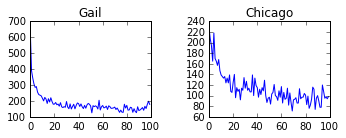

jury


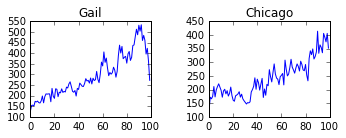

massachusetts


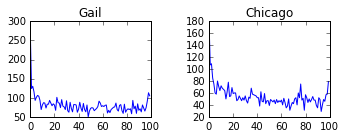

connecticut


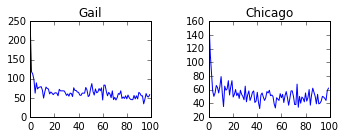

testimony


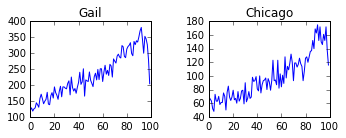

forgiven


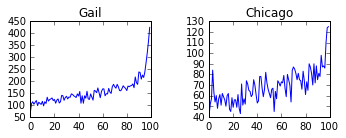

lithe


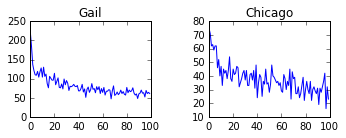

literary


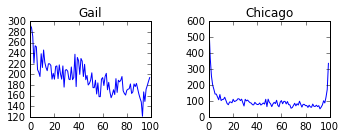

summers


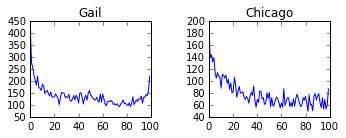

college


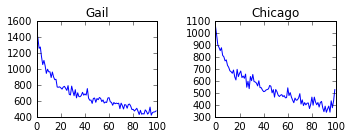

murderer


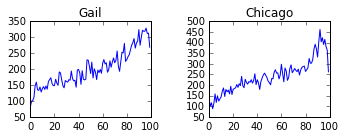

dedicated


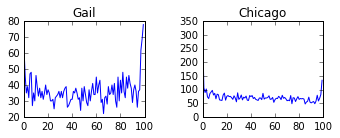

curly


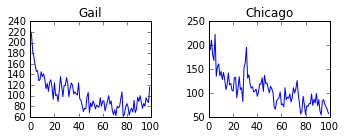

harvard


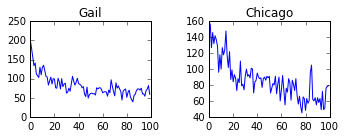

generations


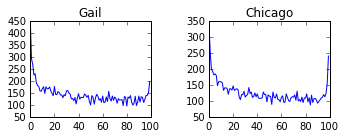

finely


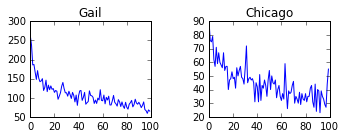

good-looking


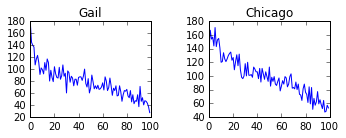

x


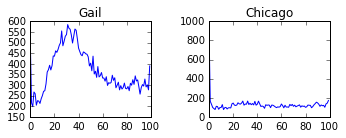

twenty-three


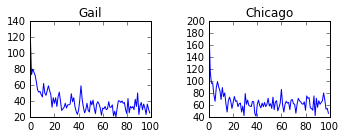

orphan


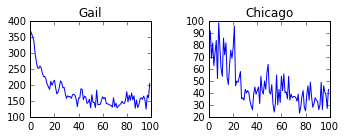

sloping


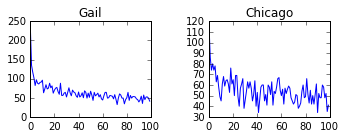

narrative


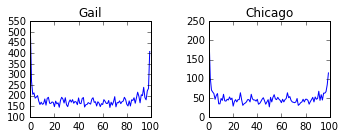

chestnut


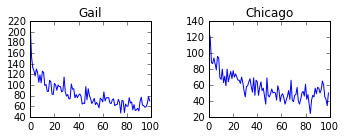

rural


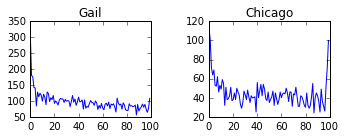

observer


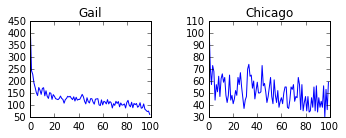

reserved


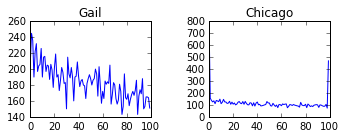

seventeen


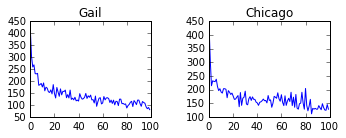

adventures


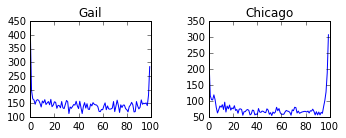

illinois


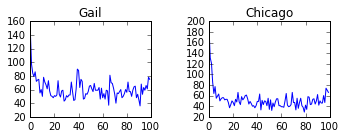

settlers


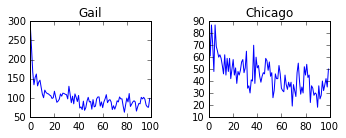

jon


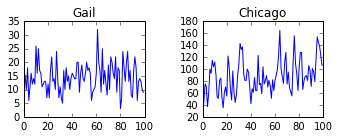

cambridge


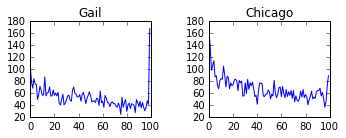

cottages


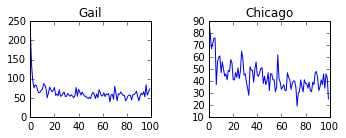

dotted


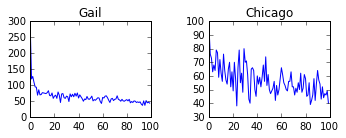

wooded


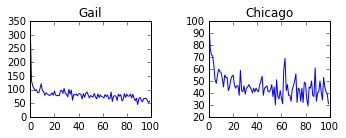

shotgun


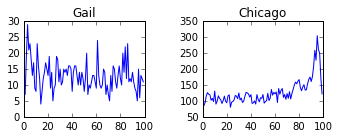

jules


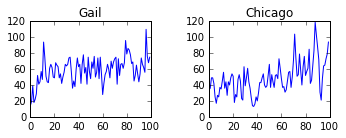

muscular


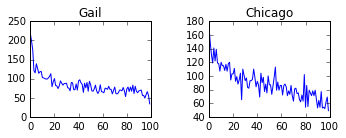

goodbye


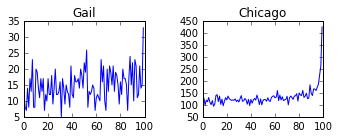

forgive


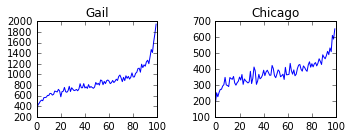

wedded


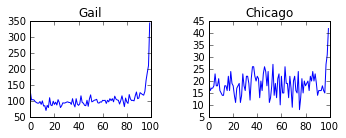

heritage


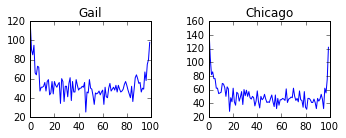

text


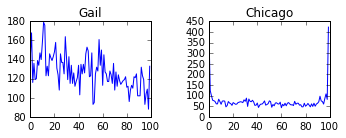

bordered


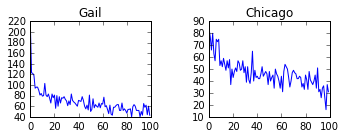

colonies


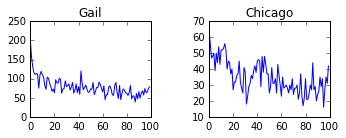

spacious


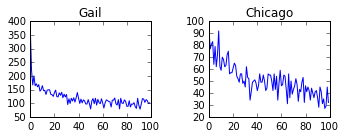

blonde


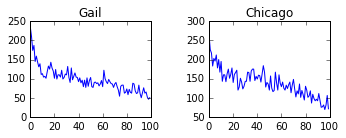

joyful


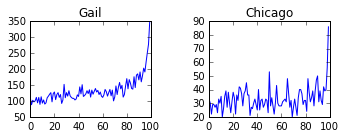

valleys


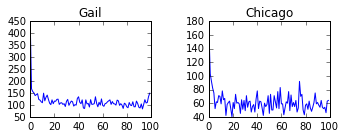

moustache


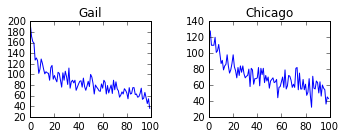

q


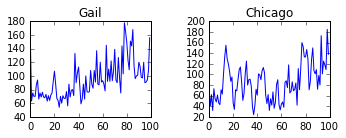

writers


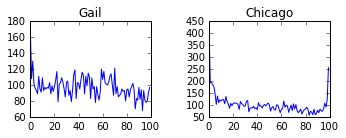

languages


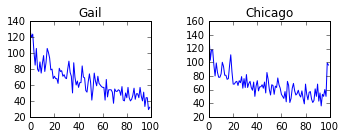

louisiana


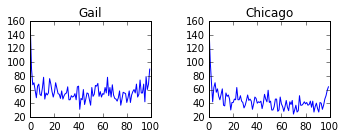

gladness


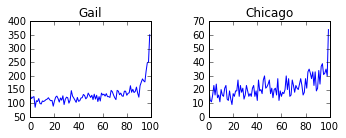

imprisonment


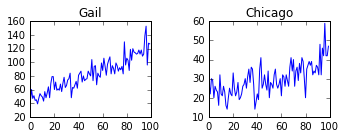

twenty-two


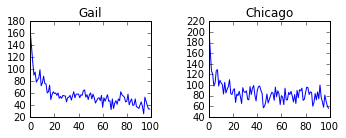

coroner


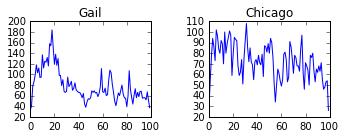

happiness


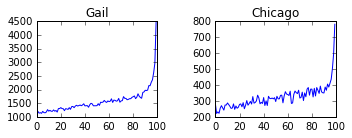

governess


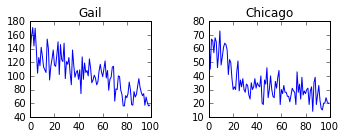

revolver


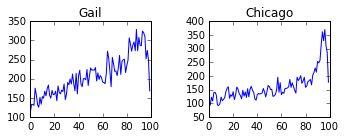

delirium


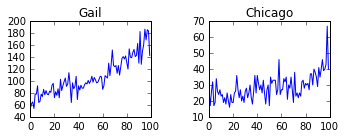

flashlight


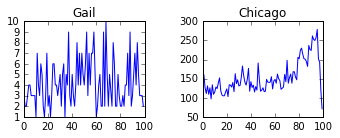

prisoner


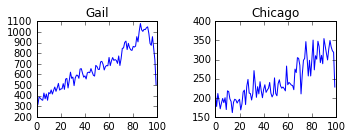

hart


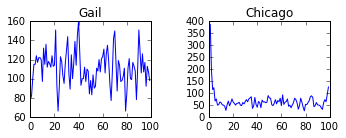

ancestors


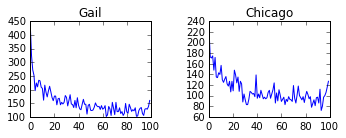

repentance


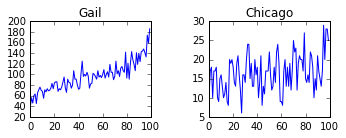

hattie


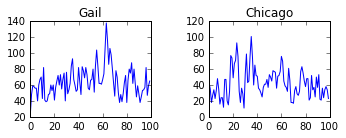

thirty-five


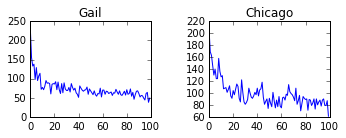

taller


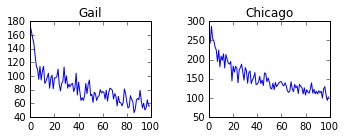

dingy


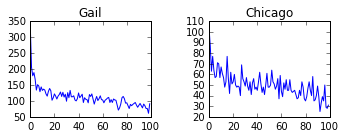

contents


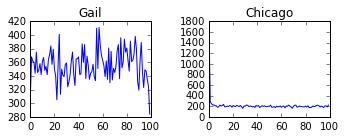

oaks


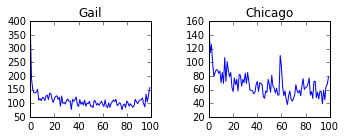

elm


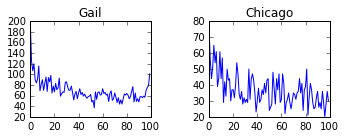

arrest


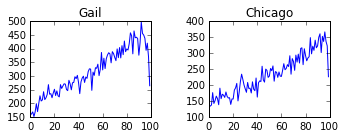

consisted


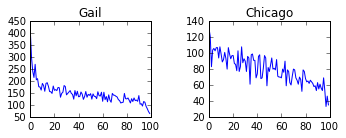

glossy


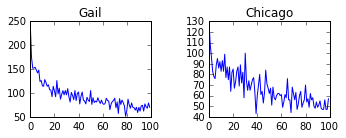

tall


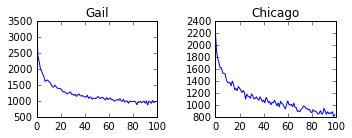

verdict


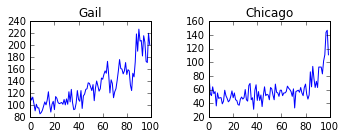

pistol


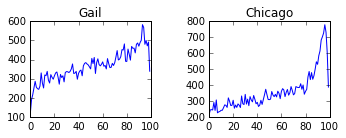

farewell


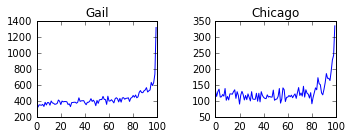

mustache


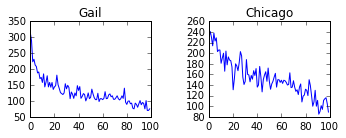

testify


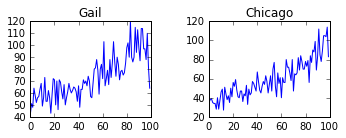

sah


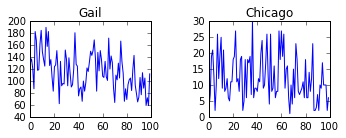

firing


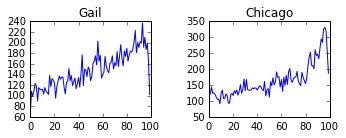

cass


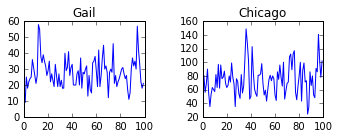

boyhood


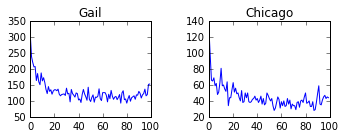

eternity


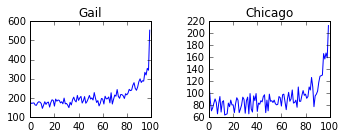

december


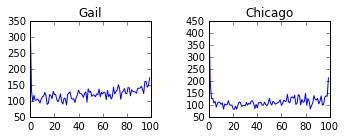

oldest


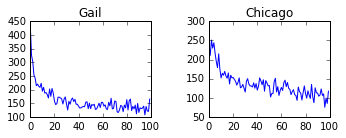

infancy


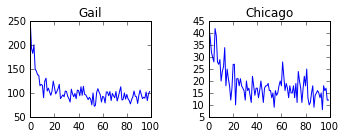

characteristics


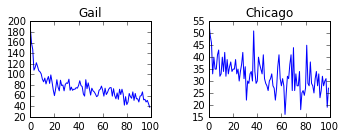

slender


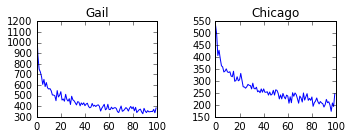

print


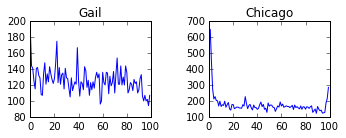

nineteen


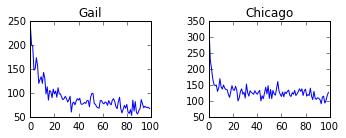

kentucky


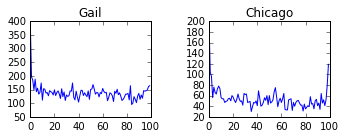

suh


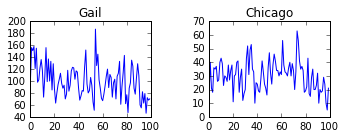

education


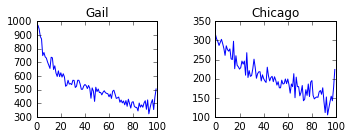

traveler


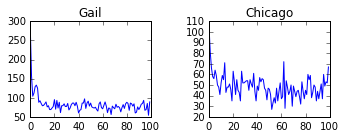

custody


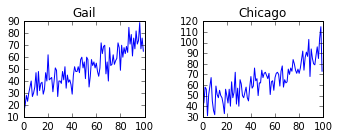

mississippi


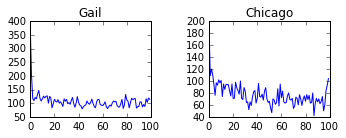

atlantic


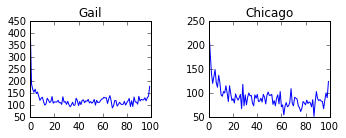

twenty-one


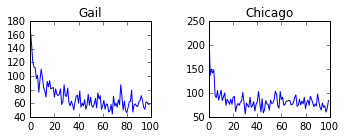

shaggy


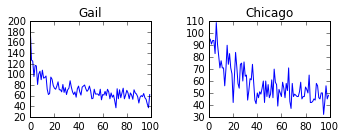

sturdy


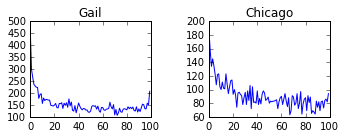

gail


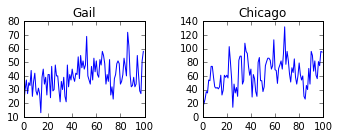

rugged


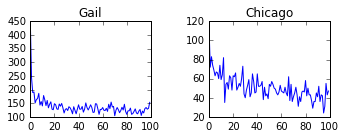

remorse


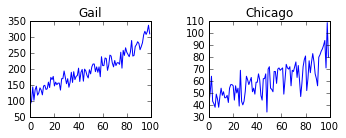

britain


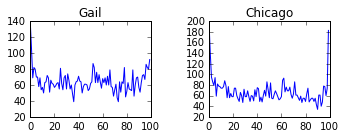

commonly


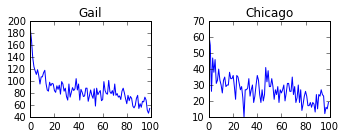

school


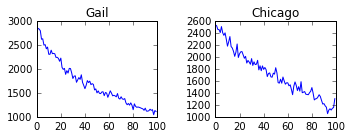

freddie


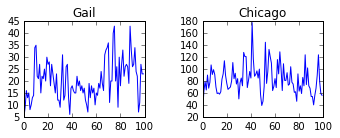

bachelor


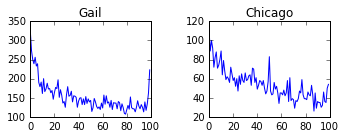

conservative


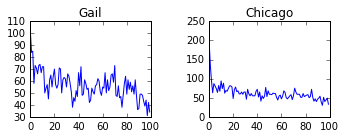

prisoners


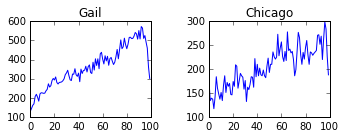

justin


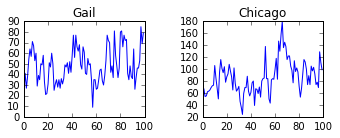

assignment


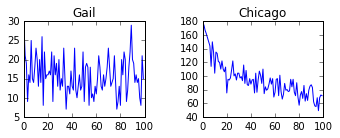

blond


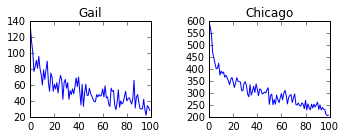

curls


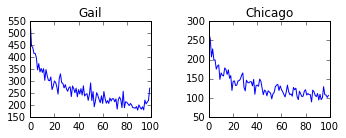

luis


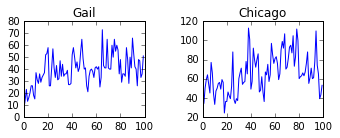

bullets


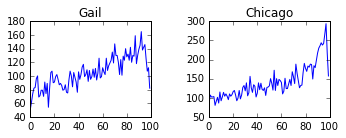

rejoice


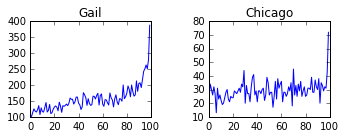

forests


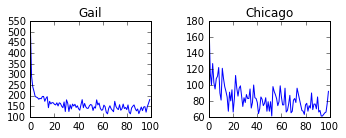

bullet


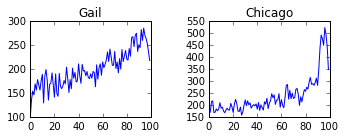

doug


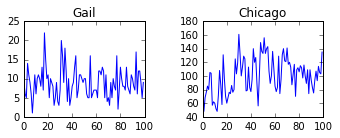

romance


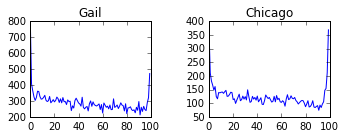

tint


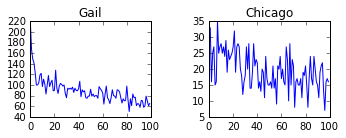

refinement


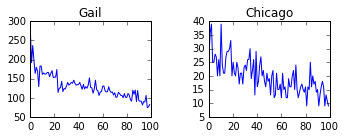

lazily


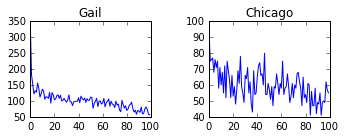

hugo


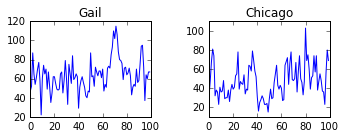

files


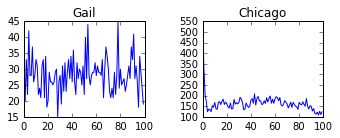

originally


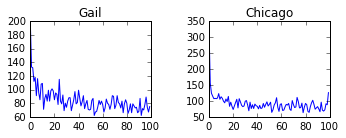

co


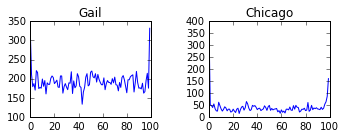

student


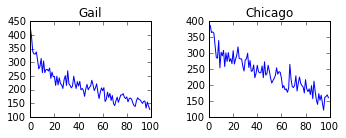

inez


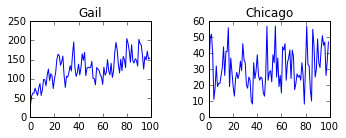

farming


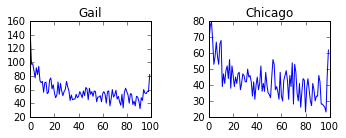

sports


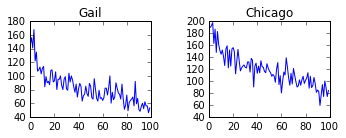

rabbi


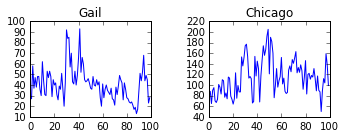

sixteen


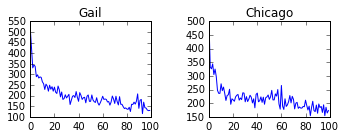

annual


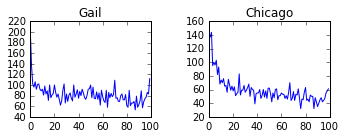

inland


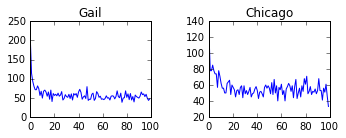

eighteen


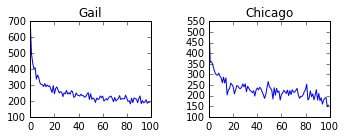

kevin


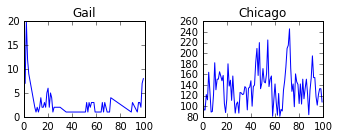

elegance


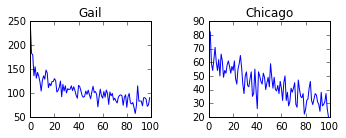

dolores


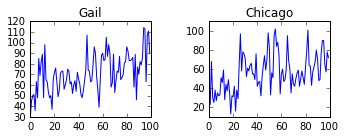

calico


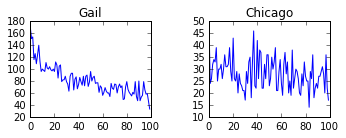

age


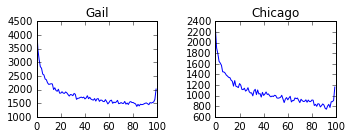

tunnel


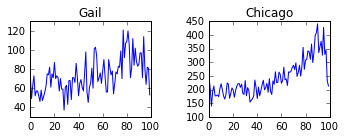

students


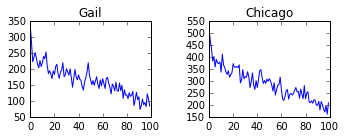

hetty


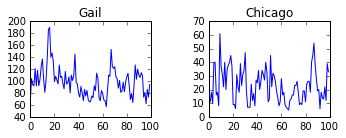

perished


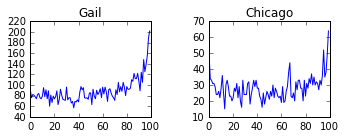

hoarsely


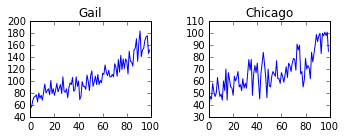

october


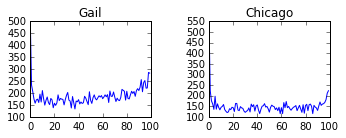

youngster


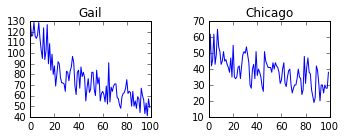

fourteen


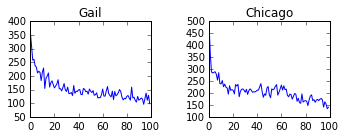

traitor


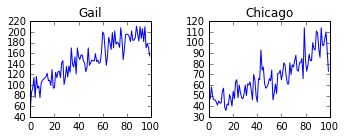

congratulate


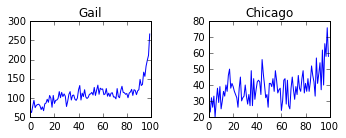

seasons


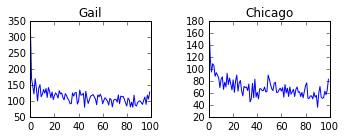

witnesses


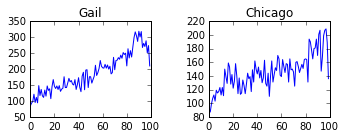

era


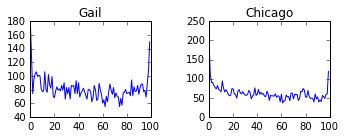

eileen


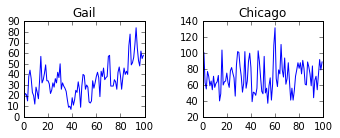

breeches


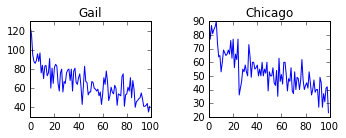

casey


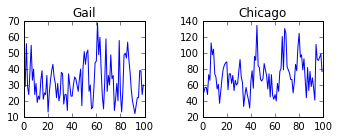

scholar


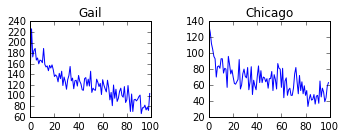

cemetery


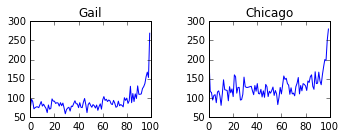

studies


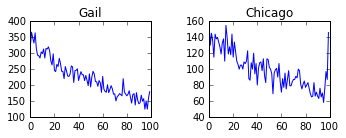

inhabited


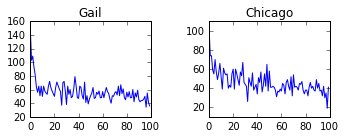

convicted


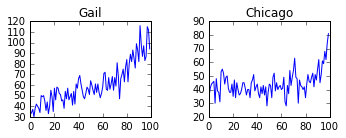

traders


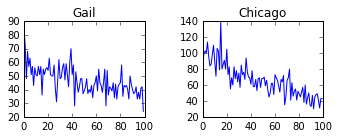

laurie


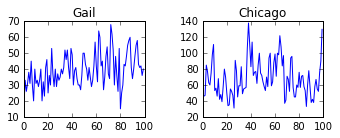

joy


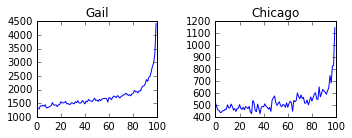

monument


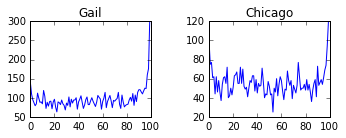

blessings


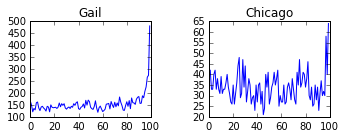

shaded


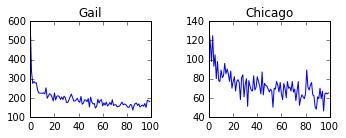

good-natured


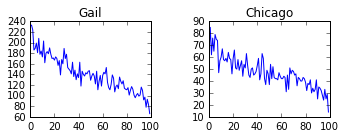

lester


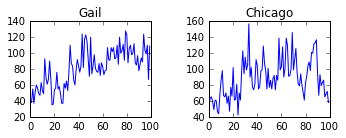

typical


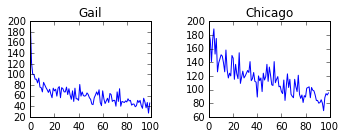

amen


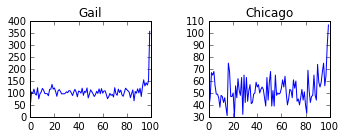

campus


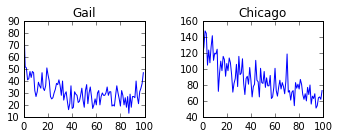

canada


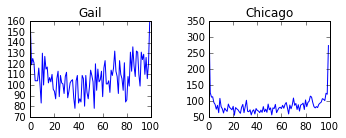

mourned


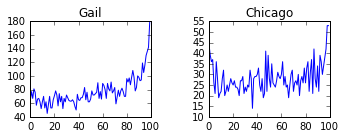

shores


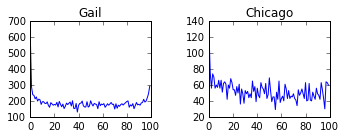

traditions


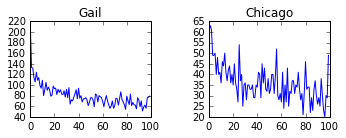

adorned


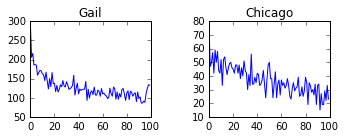

brick


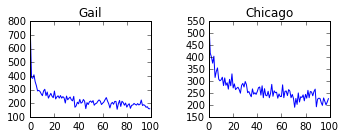

shorty


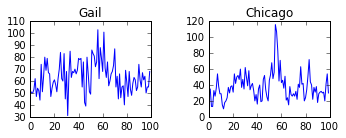

lucille


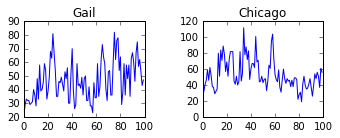

sundays


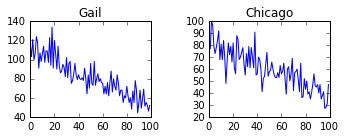

maine


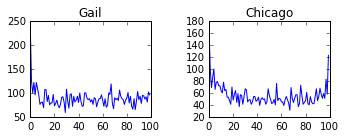

trial


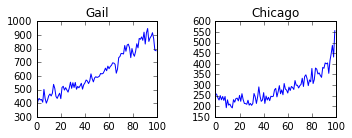

happiest


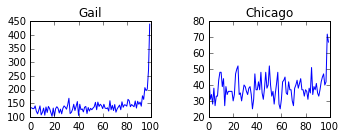

quaint


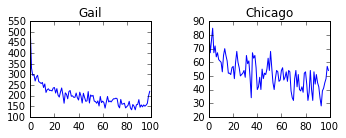

inhabitants


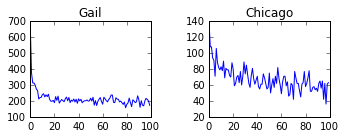

advent


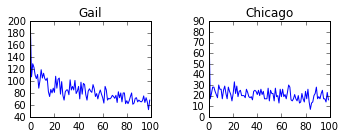

gun


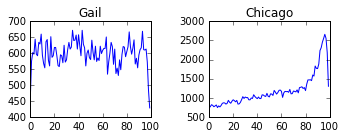

younger


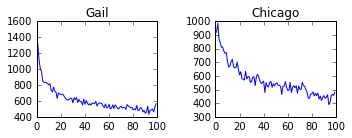

anita


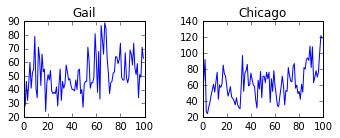

cultivated


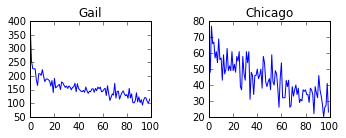

tradition


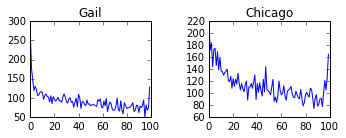

shields


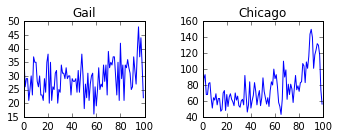

bail


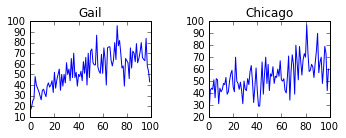

tints


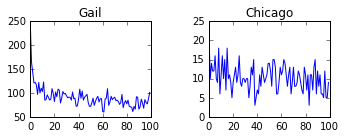

maude


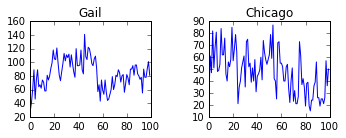

tennis


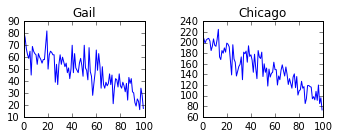

football


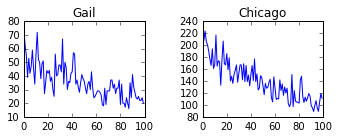

breeding


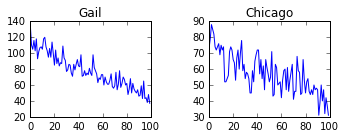

ruddy


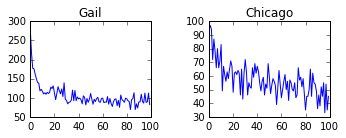

missy


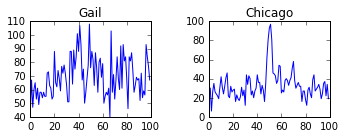

rejoicing


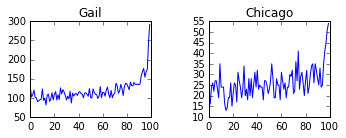

exotic


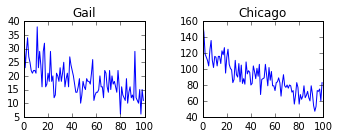

gary


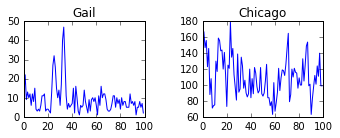

scholars


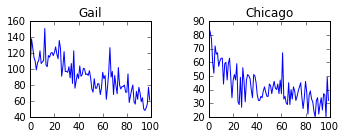

vivian


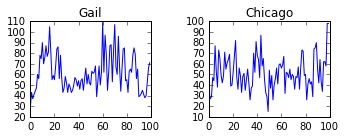

jeremy


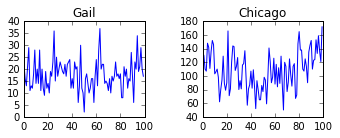

janice


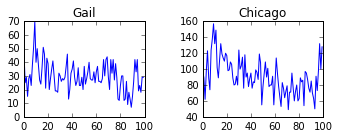

abner


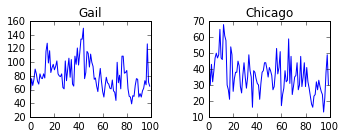

westward


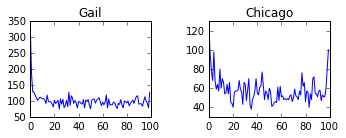

arizona


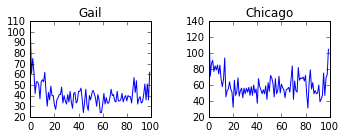

roofs


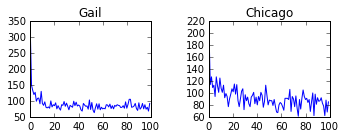

millie


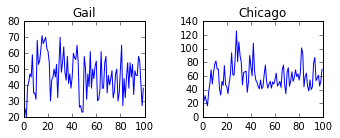

flirt


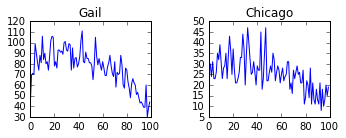

bom


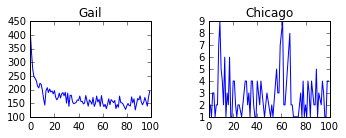

merciful


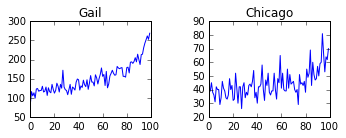

bartender


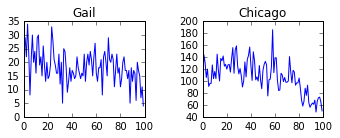

plump


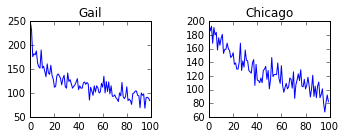

jackie


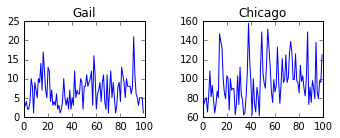

title


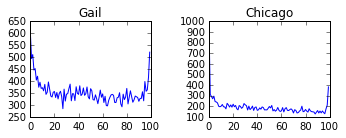

dearer


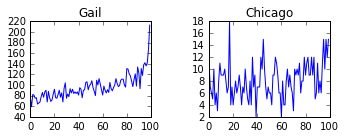

aristocracy


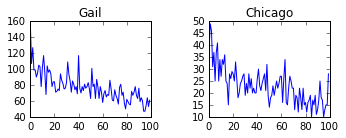

twentieth


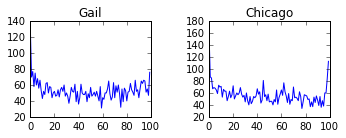

dungeon


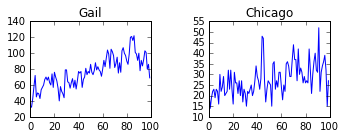

gilt


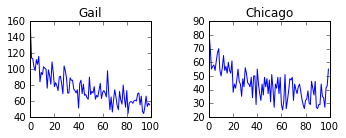

kay


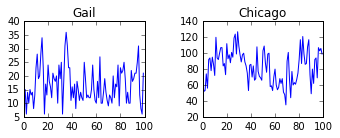

woodland


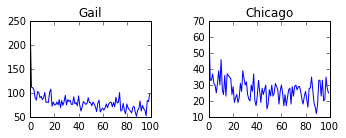

expanse


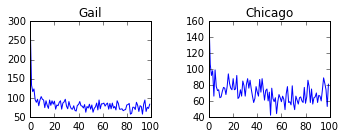

mickey


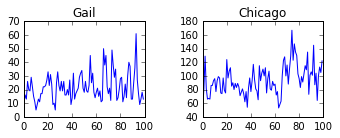

mandy


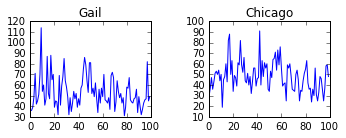

lakes


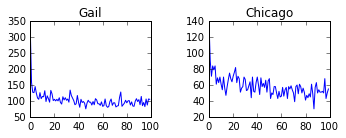

cavern


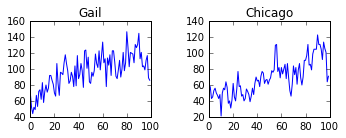

pennsylvania


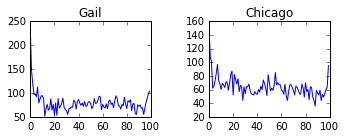

telegram


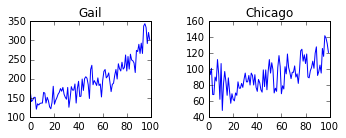

old-fashioned


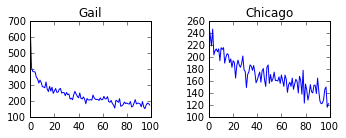

proportions


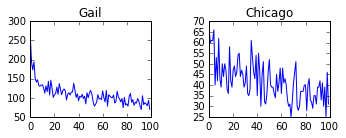

equivalent


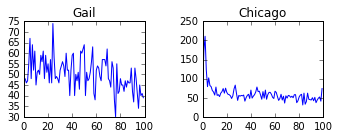

farms


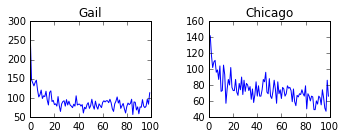

ambulance


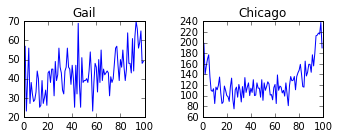

ivan


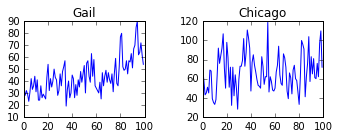

squirrel


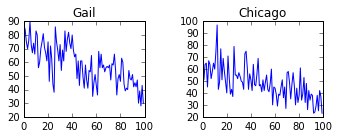

riley


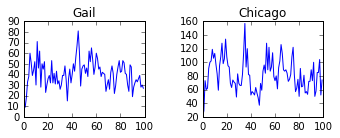

murders


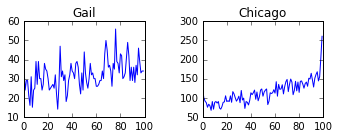

ohio


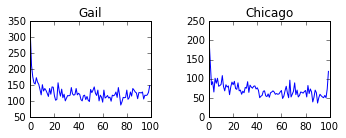

termed


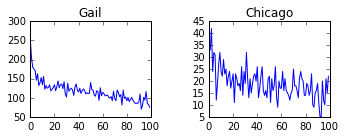

tourist


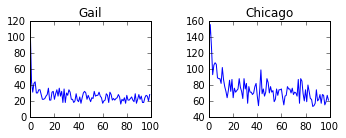

joey


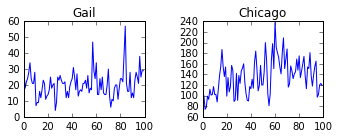

haggard


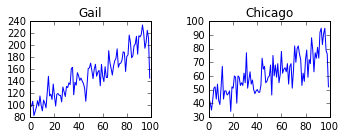

bonnie


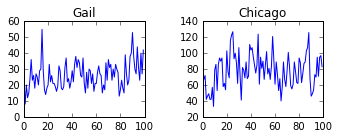

pupil


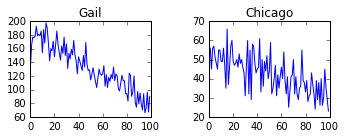

gaston


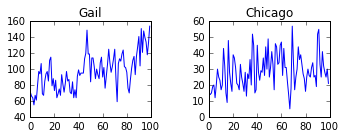

landscape


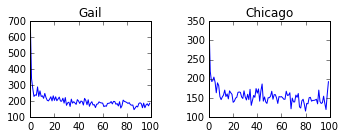

rex


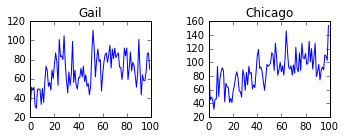

traits


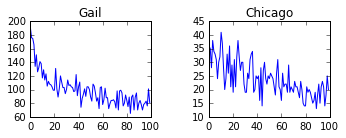

graceful


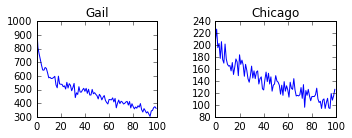

hues


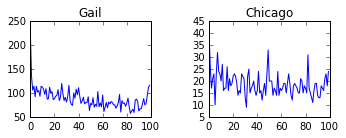

frock


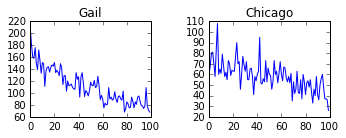

latin


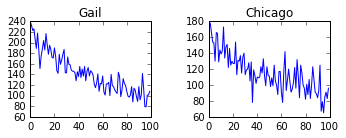

teacher


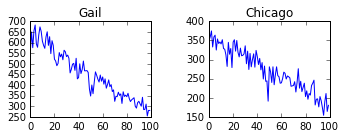

legend


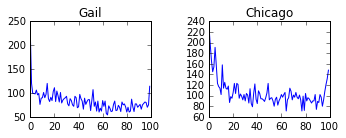

stately


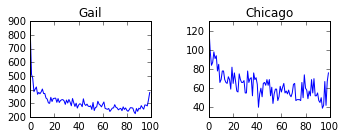

miranda


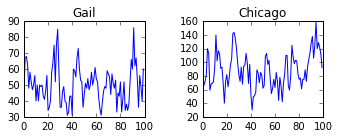

convict


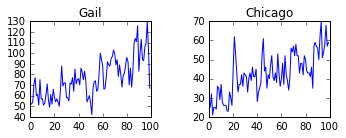

lazy


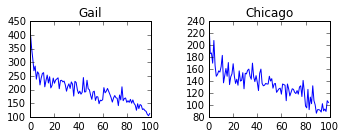

bred


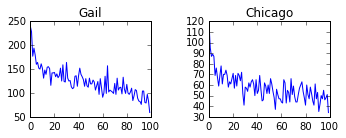

meadows


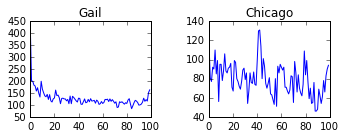

beloved


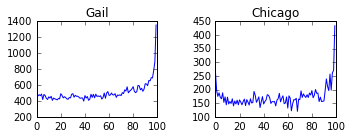

lashes


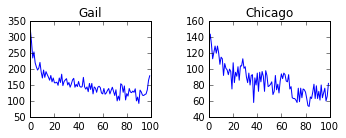

massa


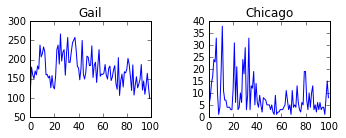

industrious


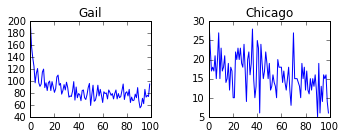

grandmothers


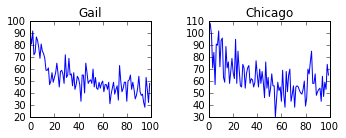

barber


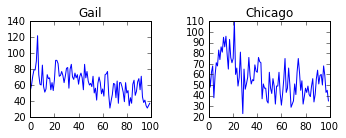

birthday


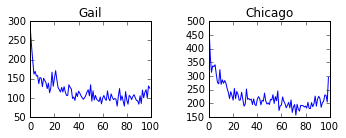

witness


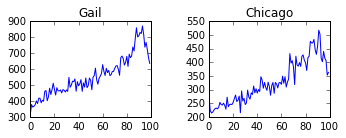

slopes


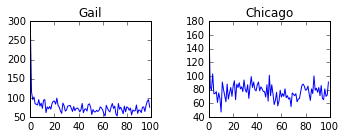

maple


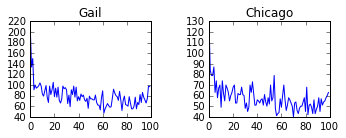

pail


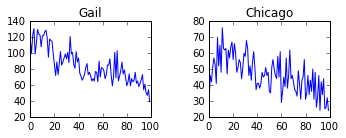

educated


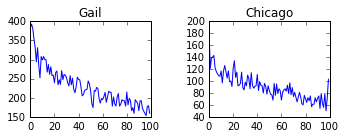

curves


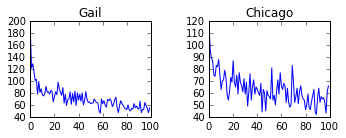

dolls


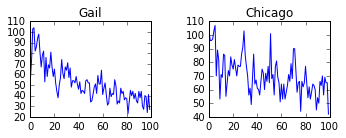

youths


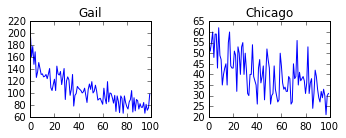

crimes


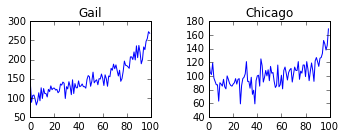

distinction


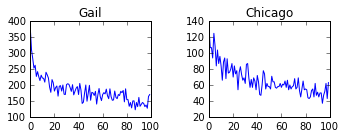

trader


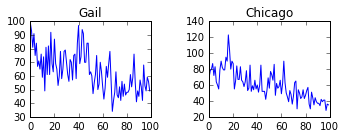

memorial


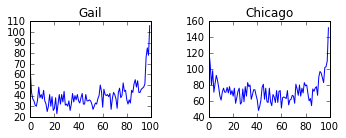

november


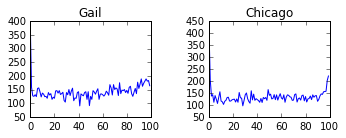

travellers


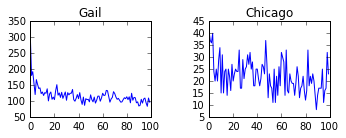

mob


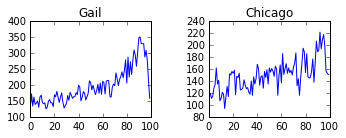

february


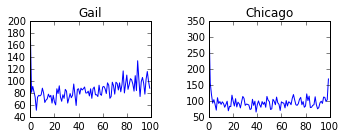

spock


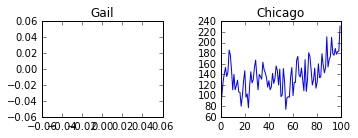

cabins


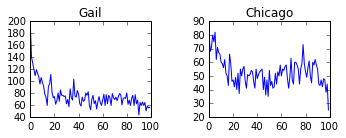

missouri


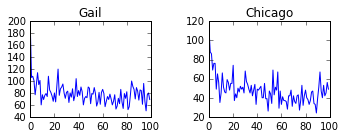

reverently


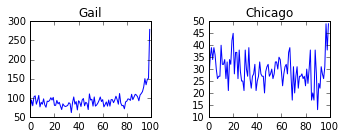

frontier


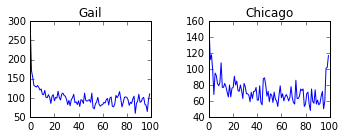

antique


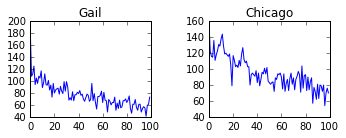

surrender


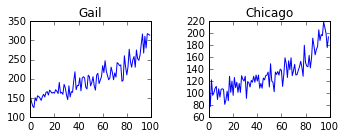

ames


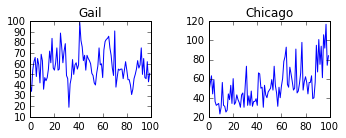

bates


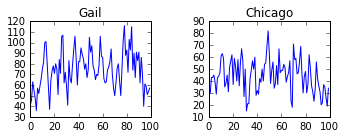

theresa


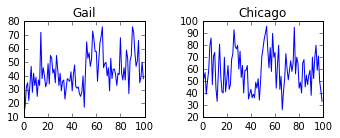

modern


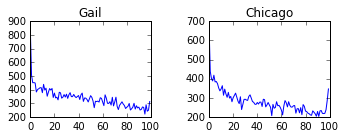

generation


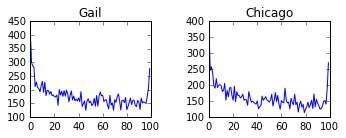

occupant


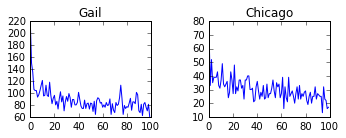

ale


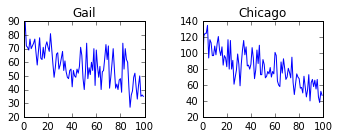

lifes


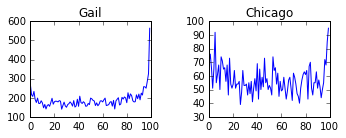

september


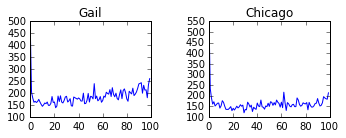

attractive


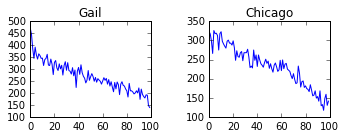

tess


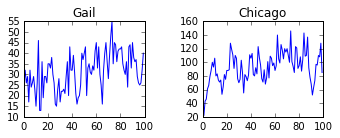

jr


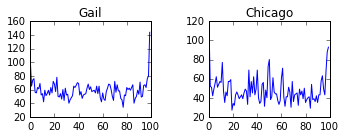

tucker


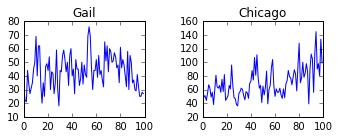

accent


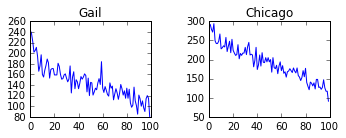

biscuits


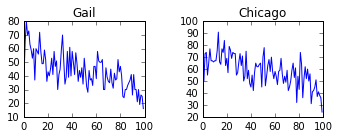

opens


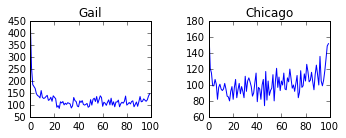

rosie


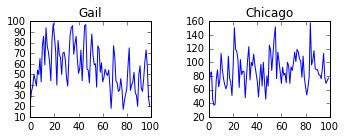

flames


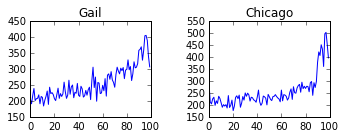

ceremony


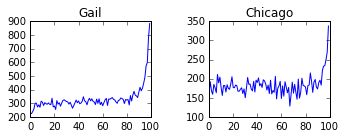

adrian


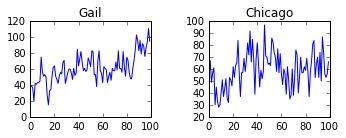

edwin


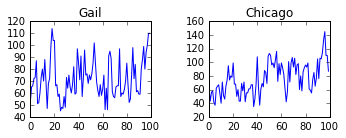

canadian


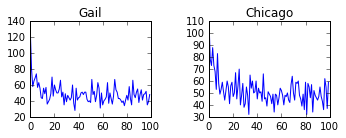

melissa


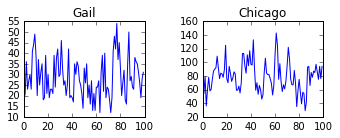

conspiracy


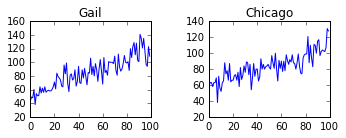

dee


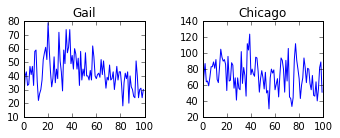

prison


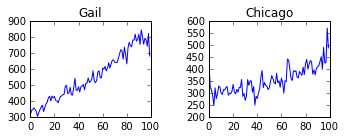

talbot


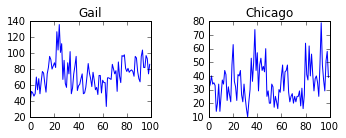

diary


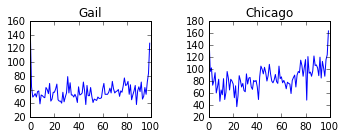

lorraine


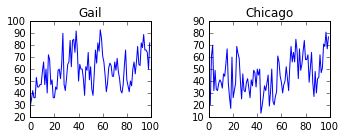

casket


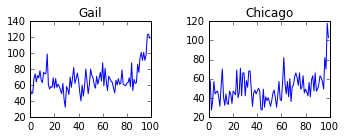

shelves


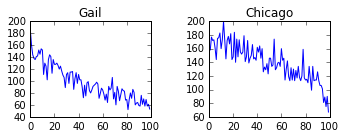

tomb


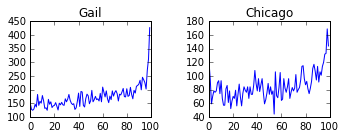

evan


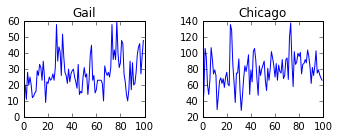

thirteen


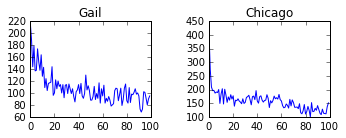

noah


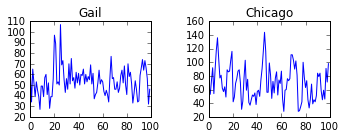

headlights


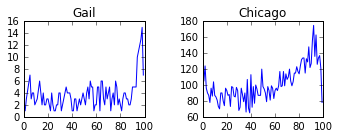

tennessee


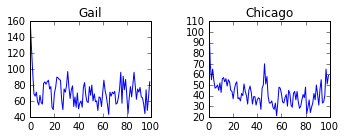

neighbours


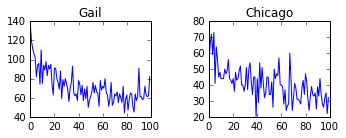

tully


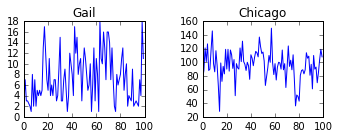

waistcoat


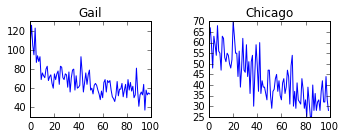

madman


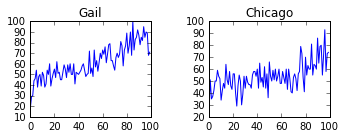

broad


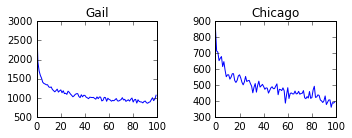

thorne


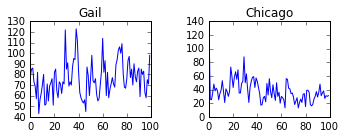

withal


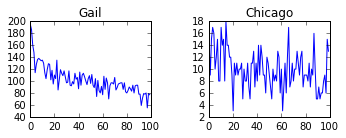

tropical


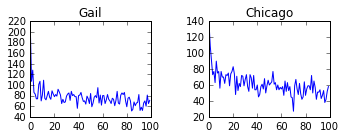

shabby


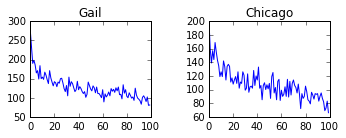

rand


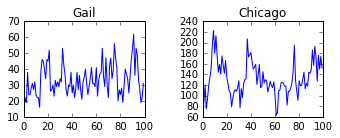

boarders


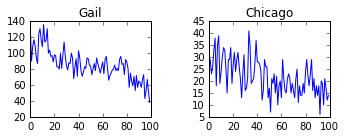

residents


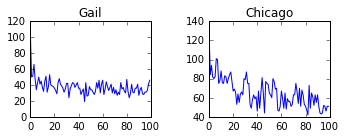

leah


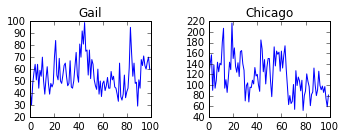

temperament


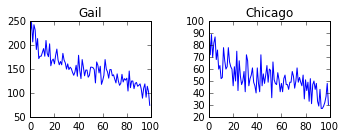

middle-aged


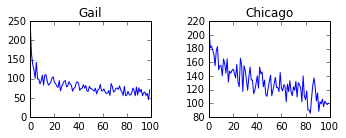

dying


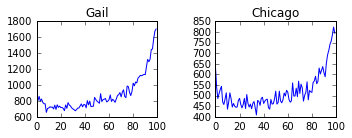

teachers


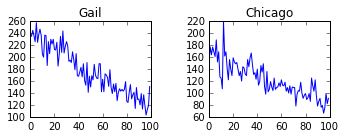

freddy


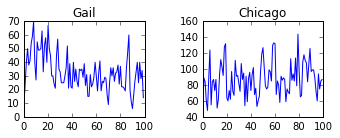

homely


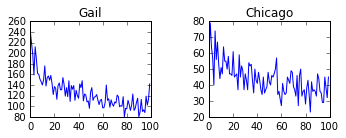

international


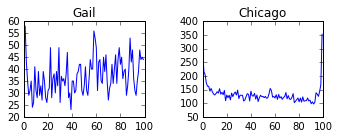

angelo


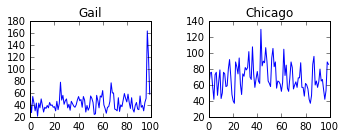

cell


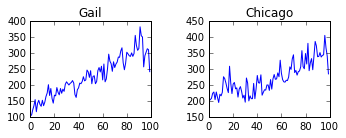

sleek


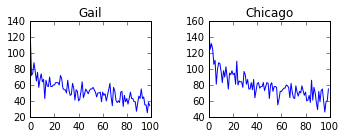

peaks


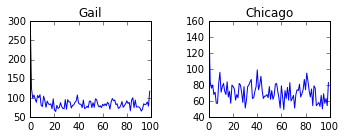

prosperous


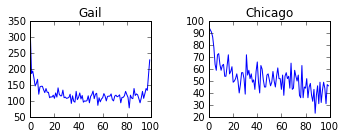

grandfather


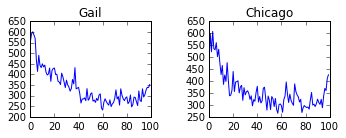

eminence


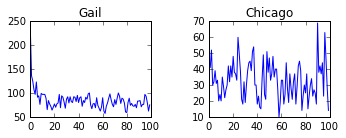

youthful


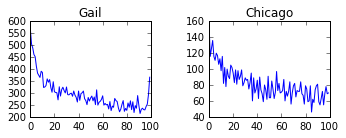

homicide


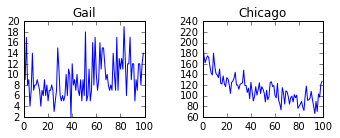

henceforth


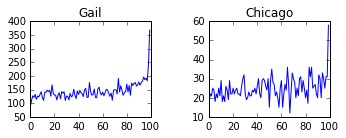

yu


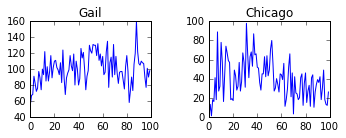

proofs


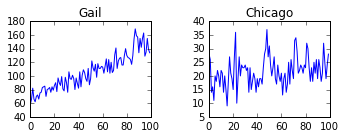

bomb


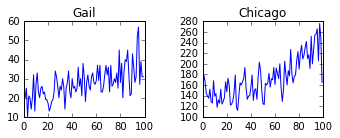

claudia


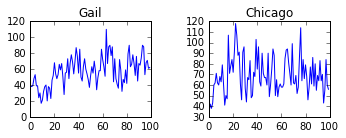

dearest


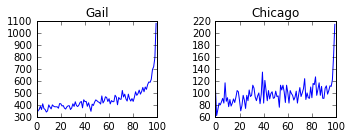

dully


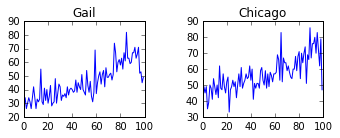

imposing


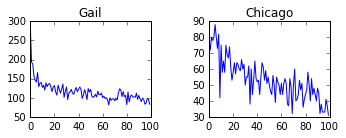

invariably


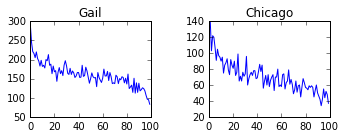

extensive


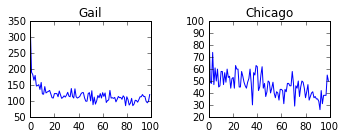

trim


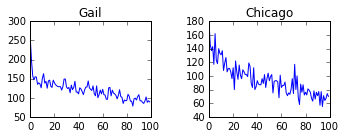

grandpa


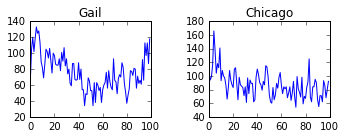

bombs


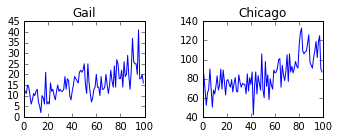

enemys


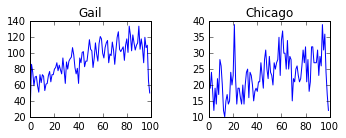

sharon


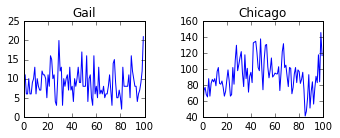

grandfathers


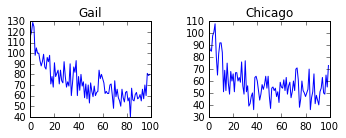

greg


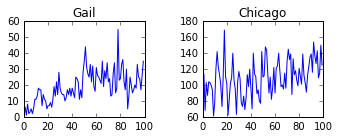

helena


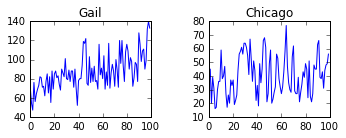

scanty


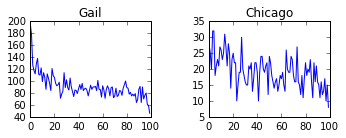

rodney


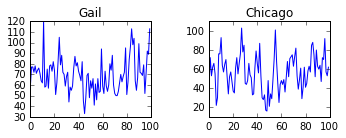

tidings


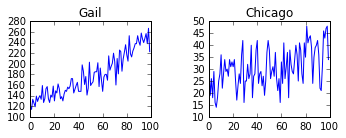

ding


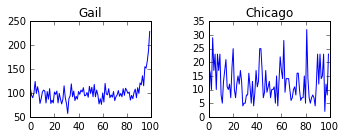

earliest


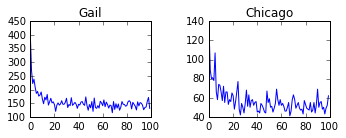

sadie


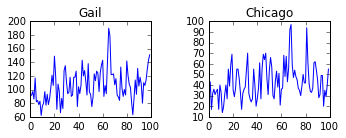

phillip


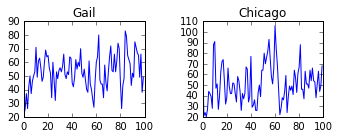

manhattan


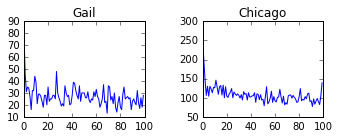

volumes


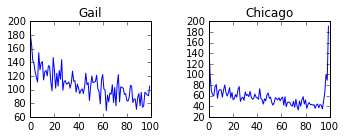

release


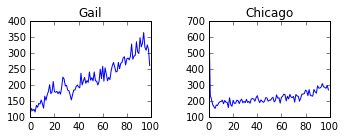

und


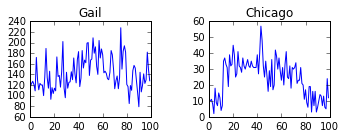

handsome


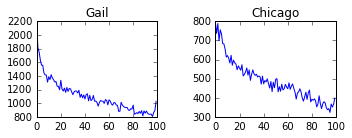

senior


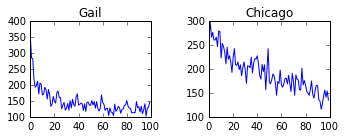

suspense


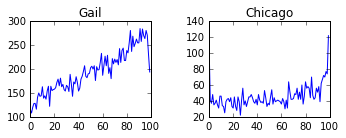

tailor


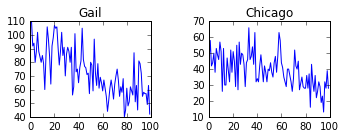

height


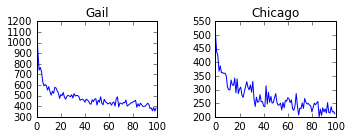

puppy


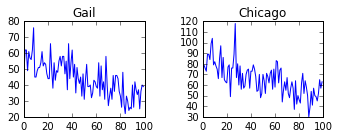

western


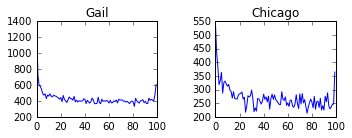

feebly


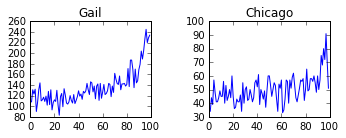

random


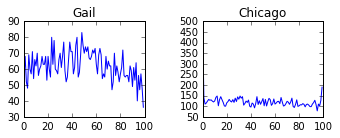

commodore


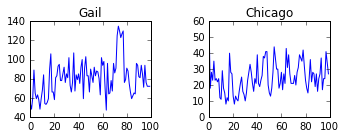

knelt


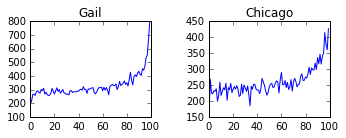

flannel


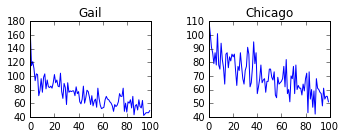

childhood


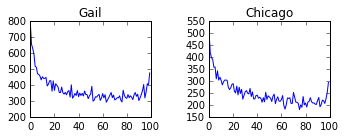

hudson


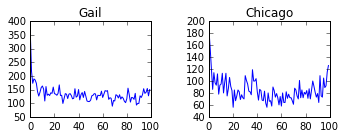

angus


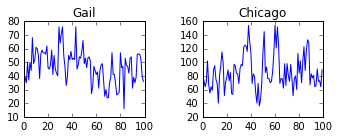

april


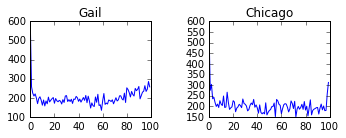

grade


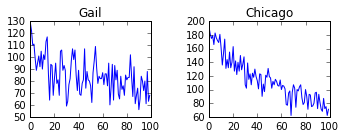

insanity


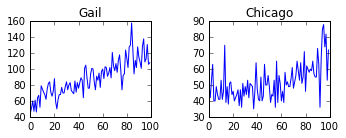

weekly


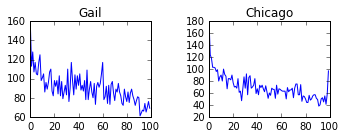

skinny


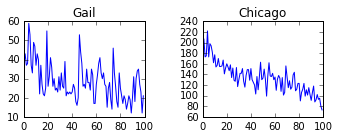

il


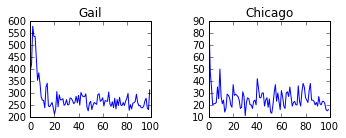

waitress


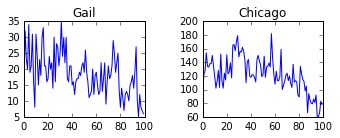

estates


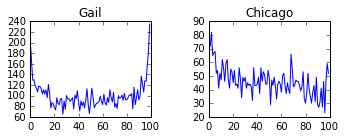

portraits


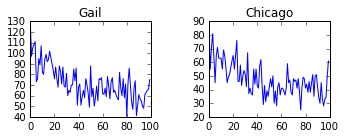

staggered


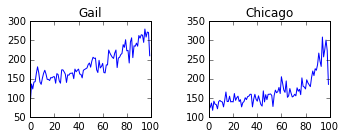

region


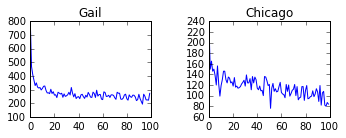

In [44]:
for i, (token, chi, p) in df.head(500).iterrows():
    plot_token_series(token)